To start click **_Cell -> Run All_** from the toolbar above.

In [2]:
# Author: Konstantin Borissov
# Course: STAT 251, UBC
# Date:   18-Nov-2020
# Purpose: Interactive visualization tool for confidence intervals, test statistics, and hypothesis testing

In [ ]:
%pip install matplotlib numpy scipy ipywidgets

In [4]:
%matplotlib notebook

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import numpy as np
import scipy.stats as stats
import ipywidgets as widgets
from ipywidgets import interact

In [15]:
mpl.rcParams['savefig.dpi'] = 65
mpl.rcParams['figure.dpi'] = 65

## 2. Hypothesis testing with unknown population mean $\mu$ and _unknown_ population standard deviation $\sigma$
### The sample standard deviation $s$ will be used to approximate the population standard deviation $\sigma$ and the sample mean will have a t-distribution. 
  
\
For two-tailed test, where the null and alternate hypotheses are:   
$H_0: \mu = \mu_0$  
$H_a: \mu \neq \mu_0$

Given a sample size of $n$, sample mean $\bar{x}$, sample mean standard deviation $s$, and a significance level of $\alpha$,

The t-distribution will have degrees of freedom: $$df = n-1$$

Sample variance: $$s^2=\frac{1}{n-1}\sum_{n}^{i=1}\left(x_i - \bar{x}\right)^2$$

The test statistic: $$t=\frac{\bar{x} - \mu_0}{\left(s\sqrt{n}\right)} \sim t_{n-1}$$  
  
Confidence Interval: $$\bar{x} \pm t_{\left(1-\frac{\alpha}{2}, df\right)} \cdot \frac{s}{\sqrt{n}} 
= \left[ 
    \bar{x} - t_{\left(1-\frac{\alpha}{2}, df\right)} \cdot \frac{s}{\sqrt{n}},\quad
    \bar{x} + t_{\left(1-\frac{\alpha}{2}, df\right)} \cdot \frac{s}{\sqrt{n}} 
 \right]$$  
 
 which gives the $(1-\alpha)\cdot 100\%$ interval.


<IPython.core.display.Javascript object>


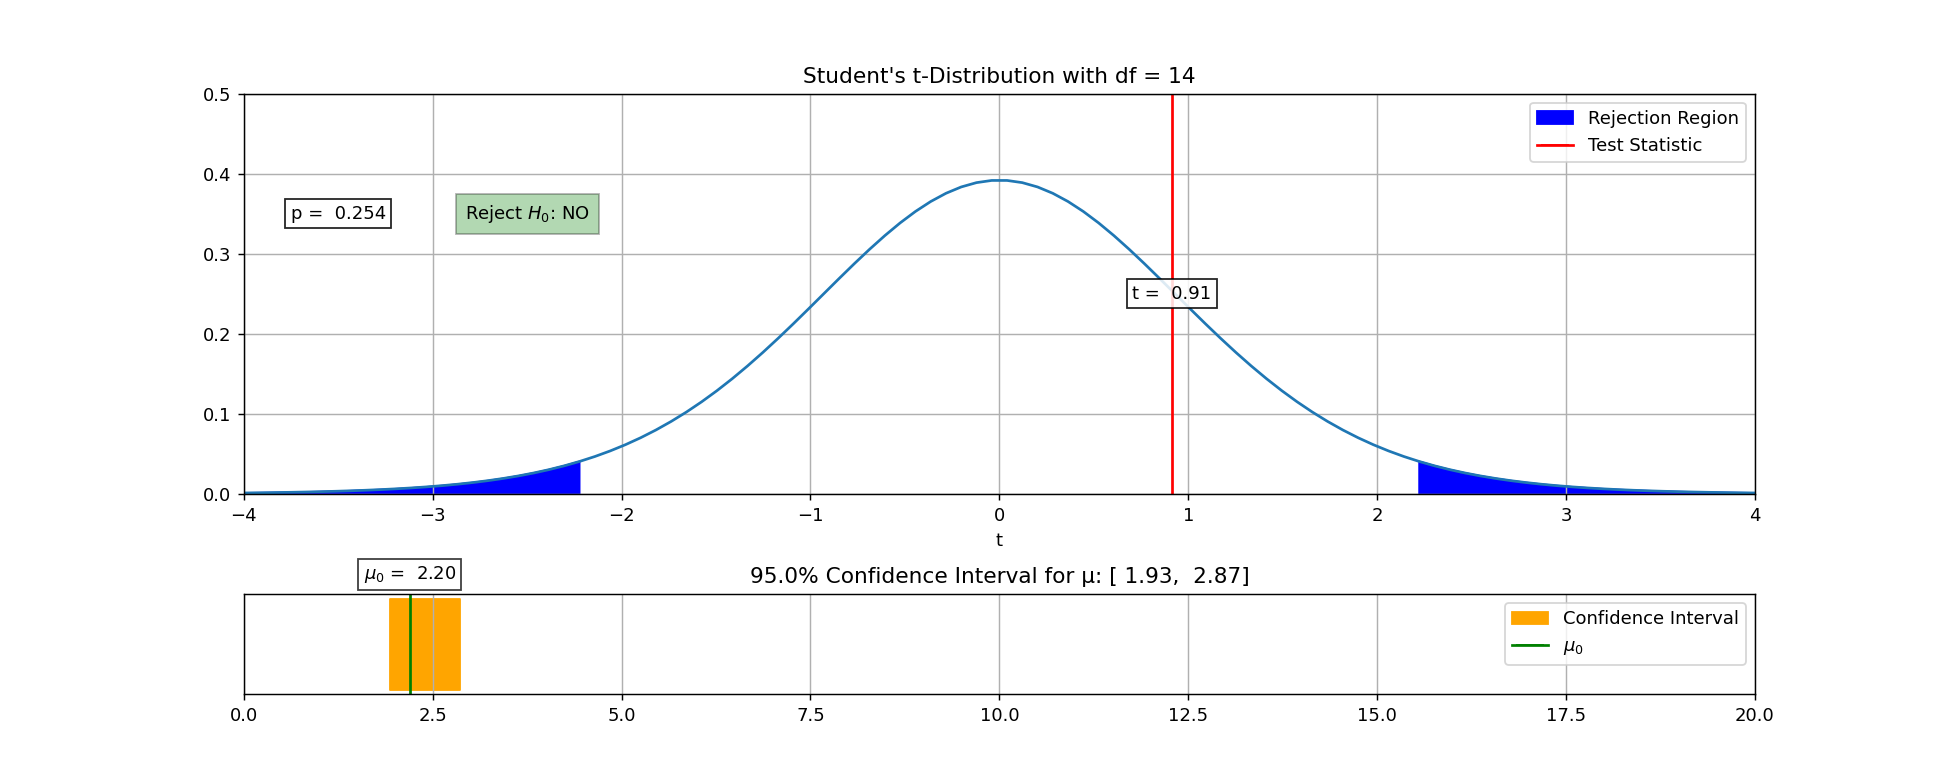

interactive(children=(Dropdown(description='Graph Size:', index=3, options=(('25%', 0.25), ('50%', 0.5), ('75%…

In [23]:
fig2, (ax3, ax4) = plt.subplots(2, 1, figsize=(15, 6), gridspec_kw={'height_ratios': [4, 1]})
ax3.set_ylim([0,0.5])
ax3.set_xlim([-4,4])
ax3.grid(True)
plt.subplots_adjust(hspace = 0.4)
ax4.set_xlim([0, 20])
ax4.grid(True)

# create legend symbols
rejection_region_patch = mpatches.Patch(color='blue', label='Rejection Region')
test_statistic_line = mlines.Line2D([], [], color='red', marker='_', markersize=15, label='Test Statistic')
ci_marker = mpatches.Patch(color='orange', label='Confidence Interval')
mu_0 = mlines.Line2D([], [], color='green', marker='_', markersize=15, label='$μ_0$')

# create legends
ax3.legend(handles=[rejection_region_patch, test_statistic_line])
ax4.legend(handles=[ci_marker, mu_0])

# set labels
ax4.yaxis.set_visible(False)
ax3.set_xlabel("t")
#ax4.set_xlabel("μ")

# generate x values
x = np.linspace(-4, 4, 100)
x2 = np.linspace(0, 20, 1000)

rejection_region = None
reject_label = None
test_stat_label = None
mu_0_label = None
p_label = None


def get_ci_ts(xbar, sample_mean_s, sample_size, alpha, mu_0):
    # calculate statistics
    df = sample_size - 1
    t = stats.t.ppf(1 - alpha/2, df)
    standard_error = sample_mean_s/np.sqrt(sample_size)
    ci_min = xbar - t*standard_error
    ci_max = xbar + t*standard_error
    test_stat = (xbar-mu_0)/(sample_mean_s/np.sqrt(sample_size))
    reject_h0 = (test_stat < -t) | (test_stat > t)
    p_value = stats.t.pdf(test_stat, df)

    # update data printout
    print(f'{(1-alpha)*100}% Confidence Interval: [{ci_min: .2f}, {ci_max: .2f}]')
    print(f'Test Statistic = {test_stat: .2f}')
    print(f't = {t: .2f}')
    return ci_min, ci_max, test_stat, t, reject_h0, p_value


# create sliders
xbar_slider = widgets.FloatSlider(value=2.5, min=0, max=5.0, step=0.1, description=r'$\bar{x}$')
s_slider = widgets.FloatSlider(value=1, min=0.05, max=5.0, step=0.1, description=r'$s$')
n_slider = widgets.IntSlider(value=4, min=2, max=100, step=1, description=r'$n$')
alpha_slider = widgets.FloatSlider(value=0.05, min=0.01, max=0.15, step=0.01, description=r'$\alpha$')
mu_0_slider = widgets.FloatSlider(value=2, min=0, max=5, step=0.1, description=r'$\mu_{0}$')

# define UI
top_hbox = widgets.HBox([xbar_slider, s_slider, n_slider])
bottom_hbox = widgets.HBox([alpha_slider, mu_0_slider])
ui=widgets.VBox([top_hbox, bottom_hbox])
display(ui)

# associate widgets with plot function
widgets.interactive_output(update_plot, {'xbar': xbar_slider, 'sample_mean_s': s_slider, 'sample_size': n_slider,
                                        'alpha': alpha_slider, 'mu_0': mu_0_slider})

def update_plot(xbar, sample_mean_s, sample_size, alpha, mu_0):
    global rejection_region, reject_label, test_stat_label, mu_0_label, p_label
    
    # calculate degrees of freedom
    df = sample_size - 1
     
    # clear plot data
    ax3.lines.clear()
    ax4.lines.clear()
    if rejection_region is not None:
        ax3.collections.remove(rejection_region)
        reject_label.remove()
        test_stat_label.remove()
        mu_0_label.remove()
        ax4.collections.clear()
        p_label.remove()

    # get new CI and statistics
    lower_bound, upper_bound, ts, t, reject_h0, p_value = get_ci_ts(xbar, sample_mean_s, sample_size, alpha, mu_0)
    
    # update confidence interval plot
    ax4.set_title(f"{(1-alpha)*100}% Confidence Interval for μ: [{lower_bound: .2f}, {upper_bound: .2f}]")
    ci = ax4.fill_between(x2, 1, where=(lower_bound <= x2) & (x2 <= upper_bound), color="orange")
    ax4.axvline(x=mu_0, color='green') # show hypothesized mu_0
    mu_0_label = ax4.text(mu_0, 1.15, f'$μ_0$ = {mu_0: .2f}', ha='center', va='bottom',
                              bbox={'facecolor': 'white', 'alpha': 0.75, 'pad': 3})
    
    # update t distribution plot
    t_pdf = stats.t.pdf(x, df)  # create t pdf with specified df
    ax3.set_title(f"Student's t-Distribution with df = {df}")
    rejection_region = ax3.fill_between(x, t_pdf, where=(x < -t) | (t < x), color='blue')
    ax3.plot(x, t_pdf, color='C0')
    ax3.axvline(x=ts, color='red')
    test_stat_label = ax3.text(ts, 0.25, f't = {ts: .2f}', ha='center', va='center',
                              bbox={'facecolor': 'white', 'alpha': 0.85, 'pad': 3})
    
    # update h_0 rejection status
    reject_text = f"Reject $H_0$: {'YES' if reject_h0 else 'NO'}"
    p_value_text = f'p = {p_value: .3f}'
    text_bg_color = 'red' if reject_h0 else 'green'
    print(p_value_text)
    print(reject_text)
    reject_label = ax3.text(-2.5, 0.35, reject_text, style='normal', ha='center', va='center', 
                            bbox={'facecolor': text_bg_color, 'alpha': 0.3, 'pad': 5})
    p_label = ax3.text(-3.5, 0.35, p_value_text, ha='center', va='center',
                              bbox={'facecolor': 'white', 'alpha': 0.85, 'pad': 3})



# get graph size in pixels
x_px, y_px = fig2.get_size_inches()*130

# graph size dropdown
graph_size_options = [(f'{val*100:.0f}%', val) for val in np.arange(0.25, 2, 0.25).tolist()]
@widgets.interact(graph_size=
                  widgets.Dropdown(options=graph_size_options, value=1, description="Graph Size:"))
def change_plot_size(graph_size = 1):
    mpl.pyplot.get_current_fig_manager().resize(x_px*graph_size, y_px*graph_size)    

Please wait. The interactive graph will appear above when it has finished loading. Use the sliders below the graph to change the function arguments.

To share, use the following link: https://mybinder.org/v2/gh/konstantinbsv/STAT251-Interactive-Graphs/HEAD